Exploratary Data Analysis for solar Data discovery country sirralone 

* Timestamp (yyyy-mm-dd hh:mm): Date and time of each observation.
* GHI (W/m²): Global Horizontal Irradiance, the total solar radiation received per square meter on a horizontal surface.
* DNI (W/m²): Direct Normal Irradiance, the amount of solar radiation received per square meter on a surface perpendicular to the rays of the sun.
* DHI (W/m²): Diffuse Horizontal Irradiance, solar radiation received per square meter on a horizontal surface that does not arrive on a direct path from the sun.
* ModA (W/m²): Measurements from a module or sensor (A), similar to irradiance.
* ModB (W/m²): Measurements from a module or sensor (B), similar to irradiance.
* Tamb (°C): Ambient Temperature in degrees Celsius.
* RH (%): Relative Humidity as a percentage of moisture in the air.
* WS (m/s): Wind Speed in meters per second.
* WSgust (m/s): Maximum Wind Gust Speed in meters per second.
* Sstdev (m/s): Standard Deviation of Wind Speed, indicating variability.
* WD (°N (to east)): Wind Direction in degrees from north.
* WDstdev: Standard Deviation of Wind Direction, showing directional variability.
* BP (hPa): Barometric Pressure in hectopascals.
* Cleaning (1 or 0): Signifying whether cleaning (possibly of the modules or sensors) occurred.
* Precipitation (mm/min): Precipitation rate measured in millimeters per minute.
* TModA (°C): Temperature of Module A in degrees Celsius.
* TModB (°C): Temperature of Module B in degrees Celsius.

In [173]:
import pandas as pd
import numpy as np

In [248]:
df = pd.read_csv(r"E:\solar-challenge-week1\solar-challenge-week1\data\sierraleone-bumbuna.csv")#load the dataset
df.shape

(525600, 19)

In [249]:
df = df.drop("Comments", axis=1)
df.shape

(525600, 18)

In [243]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [244]:
df.isna().sum() #count and sum null values

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [250]:
((df["DHI"] >=- 5) & (df["DHI"] <0)).sum() #show how many values are between -5 and 0 DHI

np.int64(148688)

In [251]:
(df["DHI"] < -5).sum() #show how many values are less than -5 DHI

np.int64(114440)

In [252]:
((df["DNI"] >=- 5) & (df["DNI"] <0)).sum() #show how many values are between -5 and 0 DNI

np.int64(266334)

In [253]:
(df["DNI"] < -5).sum() #show how many values are less than -5 DNI

np.int64(18)

Handling Negative Solar Irradiance Values (GHI, DNI, DHI)

During data analysis, I found several negative values in the GHI, DNI, and DHI columns.
Since solar irradiance cannot be negative, these values are physically impossible.
Such readings usually occur due to the following reasons:

Nighttime sensor noise – sensors sometimes record small negative values when there is no sunlight.

Instrument calibration offsets – slight inaccuracies in sensor calibration can cause small negative readings.

Data processing errors – incorrect transformations or unit conversions during data handling may lead to unrealistic negative results.

To correct this issue, I divided the negative data into two categories:

Category 1: Values between 0 and -5 W/m²
These small negative values are likely caused by nighttime noise.
Since solar radiation is effectively zero during the night, these values were replaced with 0.

Category 2: Values less than -5 W/m²
These are too large to be explained by sensor noise and are likely due to instrument calibration errors or data processing issues.
Therefore, these records were removed from the dataset to maintain data accuracy.

This cleaning process ensures that the irradiance data (GHI, DNI, DHI) only contains physically meaningful, non-negative values, improving the reliability of subsequent analysis.

all values b/n 0 and -5 replaced by 0

In [254]:
cols = ["GHI", "DNI", "DHI"]
for c in cols:
    df.loc[(df[c] >= -5) & (df[c] < 0), c] = 0 # all negative values b/n 0 and _5 replaced by 0 for "GHI", "DNI", "DHI"
df.shape

(525600, 18)

all values b/n less than -5 remove

In [255]:
cols = ["GHI", "DNI", "DHI"]
df = df[~(df[cols] < -5).any(axis=1)]
df.shape

(408194, 18)

In [256]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000,408194.000000
mean,263.198232,150.038488,149.715999,266.046888,255.068274,27.080424,79.381960,1.263714,1.867067,0.397401,146.232145,8.137457,999.956481,0.001240,0.005784,35.184709,35.205756
std,312.959753,237.670357,163.524501,317.462157,304.859913,4.287031,21.810749,1.256329,1.628472,0.294391,113.702400,7.813407,2.200984,0.035186,0.053098,12.740143,12.272320
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,11.000000,11.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.600000,68.500000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,24.200000,24.500000
50%,114.900000,0.700000,98.000000,114.100000,109.000000,26.100000,86.900000,1.100000,1.900000,0.500000,182.500000,7.800000,1000.000000,0.000000,0.000000,30.200000,30.300000
75%,478.100000,266.000000,271.400000,478.000000,458.200000,30.300000,97.400000,2.100000,2.900000,0.600000,241.700000,13.000000,1002.000000,0.000000,0.000000,45.400000,45.800000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


In [257]:
from  scipy import stats  

In [258]:
print(df.shape)

(408194, 18)


In [259]:
print(len(df))

408194


finding Z-scores for GHI, DNI, DHI, ModA, ModB, WS,WSgust

In [ ]:
columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

z_score = df[columns].apply(lambda x: np.abs(stats.zscore(x, nan_policy="omit")))
outlier_mask = z_score > 3
outlier_flags = outlier_mask.add_suffix("_outlier")
df_with_outliers = pd.concat([df[columns], outlier_flags], axis=1)
df_outlier = df_with_outliers[outlier_mask.any(axis=1)]

print(f"Total rows with outliers: {len(df_outlier)}")
print(df_outlier.head())

Total rows with outliers: 5718
        GHI    DNI    DHI    ModA    ModB   WS  WSgust  GHI_outlier  \
671  1154.0  755.7  491.3  1237.0  1208.0  1.2     1.9        False   
781  1126.0  815.0  373.3  1202.0  1175.0  0.6     1.6        False   
782  1151.0  813.0  400.1  1226.0  1198.0  2.1     2.6        False   
783  1149.0  771.6  436.9  1219.0  1190.0  2.8     4.4        False   
790  1184.0  773.5  471.7  1259.0  1231.0  1.6     2.1        False   

     DNI_outlier  DHI_outlier  ModA_outlier  ModB_outlier  WS_outlier  \
671        False        False          True          True       False   
781        False        False         False          True       False   
782        False        False          True          True       False   
783        False        False          True          True       False   
790        False        False          True          True       False   

     WSgust_outlier  
671           False  
781           False  
782           False  
783           F

In [264]:
print("original shape:",df.shape)
print("outlier shape:",df_outlier.shape)

original shape: (408194, 18)
outlier shape: (5718, 14)


In [265]:
df_clean = df[(z_score< 3).all(axis=1)]

In [266]:
df_clean.shape

(402476, 18)

In [267]:
df_clean.to_csv(r"e:\solar-challenge-week1\solar-challenge-week1\data\sierraleone_clean.csv",index = False) # save the cleaned datadf_clean

In [268]:
df_clean = pd.read_csv(r"e:\solar-challenge-week1\solar-challenge-week1\data\sierraleone_clean.csv")
df_clean.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


In [269]:
df_clean.shape

(402476, 18)

Time Series Analysis

In [52]:
import matplotlib.pyplot as plt

In [271]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"]) # change to datetime 

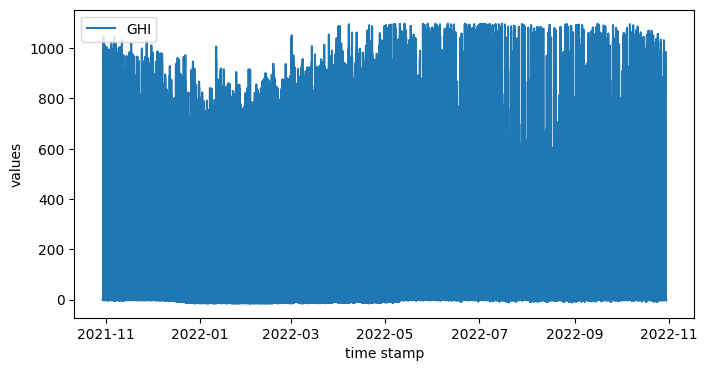

In [55]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["GHI"],label = "GHI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

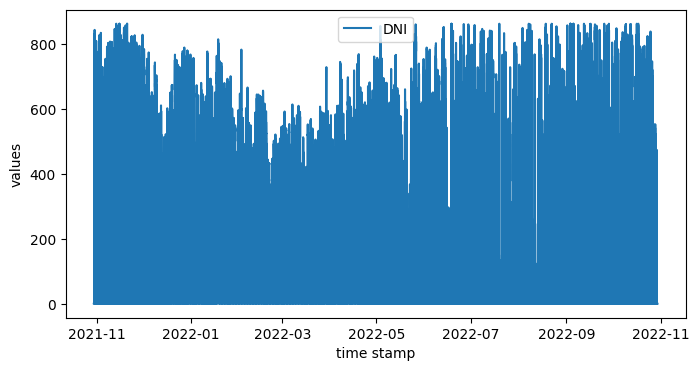

In [272]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["DNI"],label = "DNI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

e:\solar-challenge-week1\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


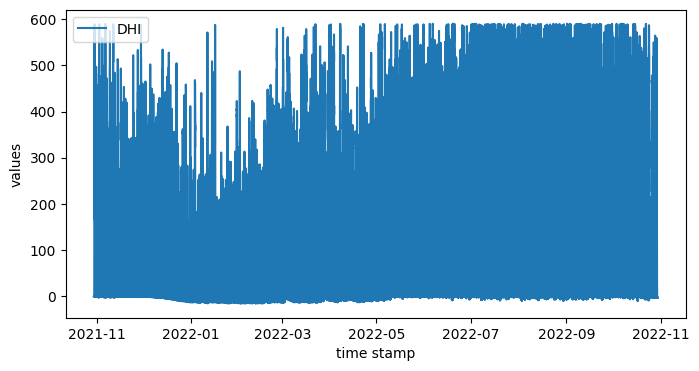

In [57]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["DHI"],label = "DHI")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

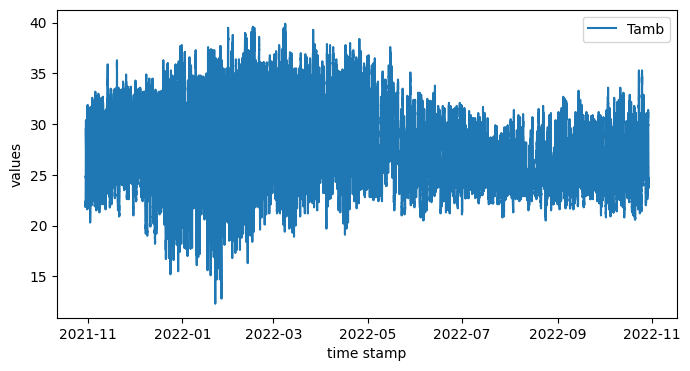

In [278]:
plt.figure(figsize=(8,4))
plt.plot(df_clean["Timestamp"],df_clean["Tamb"],label = "Tamb")
plt.xlabel("time stamp")
plt.ylabel("values")
plt.legend()
plt.show()

In [279]:
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"]) # change to datetime 
df_clean["Month"] = df_clean["Timestamp"].dt.month # change to a month

monthly_avg_GHI = df_clean.groupby("Month")["GHI"].mean()

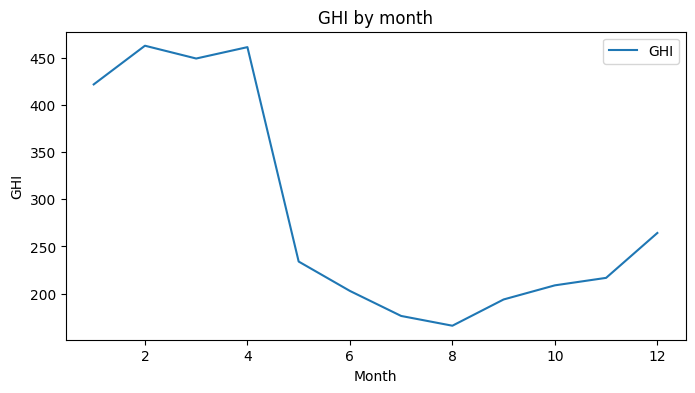

In [280]:
monthly_avg_GHI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("GHI")
plt.title("GHI by month")
plt.legend()
plt.show()

In [281]:
monthly_avg_DNI = df_clean.groupby("Month")["DNI"].mean()

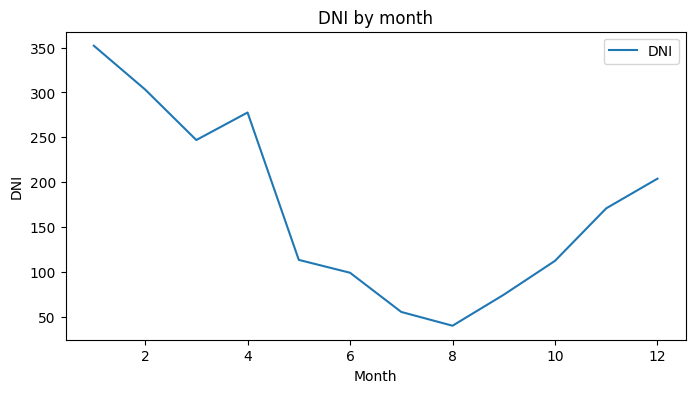

In [282]:
monthly_avg_DNI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("DNI")
plt.title("DNI by month")
plt.legend()
plt.show()

In [283]:
monthly_avg_DHI= df_clean.groupby("Month")["DHI"].mean()

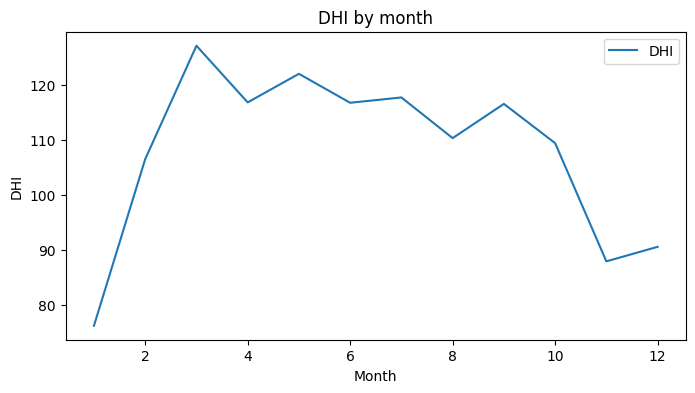

In [65]:
monthly_avg_DHI.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("DHI")
plt.title("DHI by month")
plt.legend()
plt.show()

In [284]:
monthly_avg_Tamb = df_clean.groupby("Month")["Tamb"].mean()


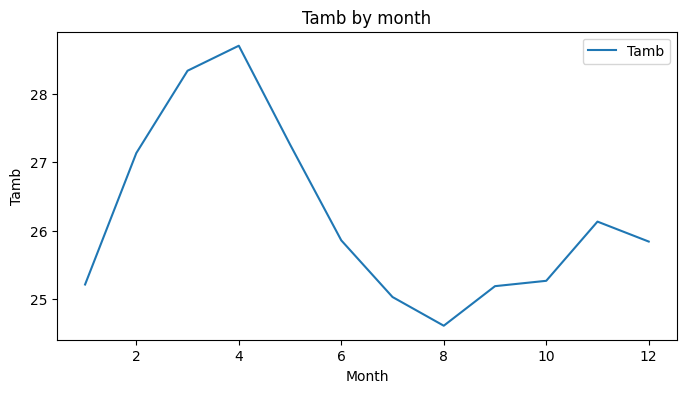

In [68]:
monthly_avg_Tamb.plot(figsize=(8,4))
plt.xlabel("Month")
plt.ylabel("Tamb")
plt.title("Tamb by month")
plt.legend()
plt.show()

Cleaning Impact


In [288]:
average_value = df_clean.groupby("Cleaning")["ModA"].mean()

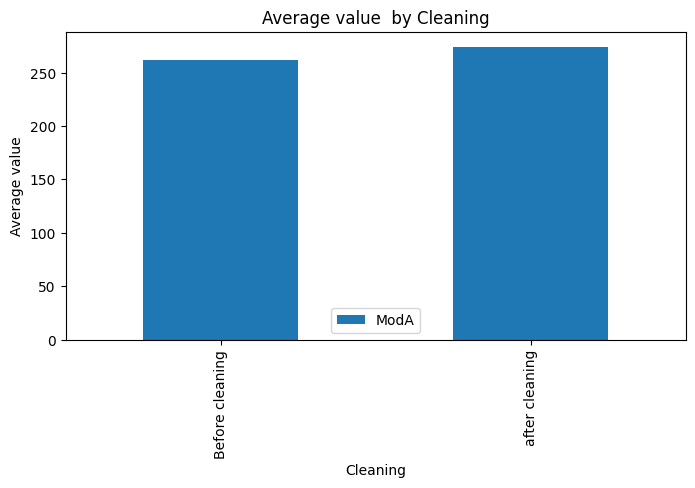

In [289]:
average_value.plot(kind = "bar",figsize=(8,4))
plt.xticks(ticks= [0,1],labels = ["Before cleaning","after cleaning"])
plt.ylabel("Average value")
plt.title("Average value  by Cleaning")
plt.legend()
plt.show()

In [290]:
average_value = df_clean.groupby("Cleaning")["ModB"].mean()

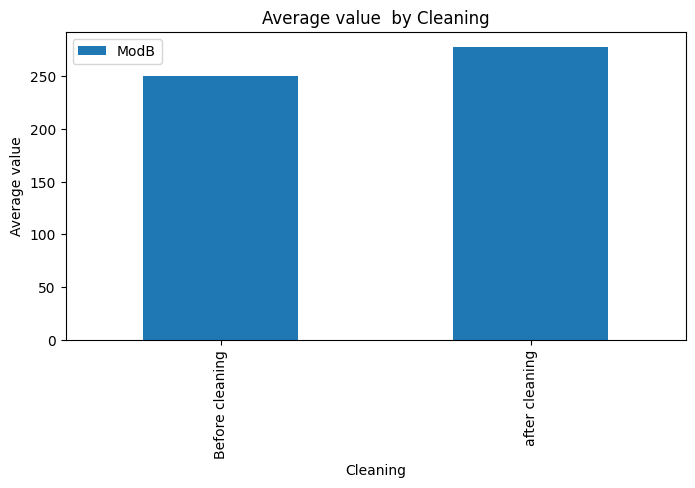

In [291]:
average_value.plot(kind = "bar",figsize=(8,4))
plt.xticks(ticks= [0,1],labels = ["Before cleaning","after cleaning"])
plt.ylabel("Average value")
plt.title("Average value  by Cleaning")
plt.legend()
plt.show()

Correlation & Relationship Analysis

In [292]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[cols].corr()

In [293]:
import seaborn as sns

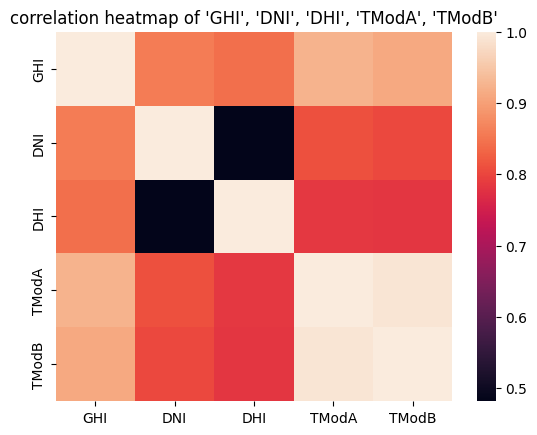

In [295]:
plt.Figure(figsize=(8,4))
sns.heatmap(corr_matrix)
plt.title("correlation heatmap of 'GHI', 'DNI', 'DHI', 'TModA', 'TModB'")
plt.show()

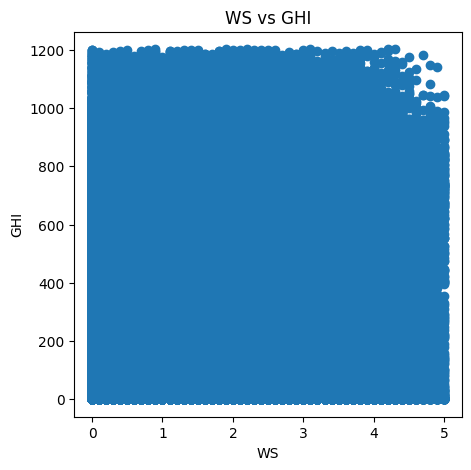

In [296]:
wind_cols = ["WS", "WSgust","WD"]
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WS"], df_clean['GHI'])
plt.xlabel("WS")
plt.ylabel('GHI')
plt.title("WS vs GHI")
plt.show()


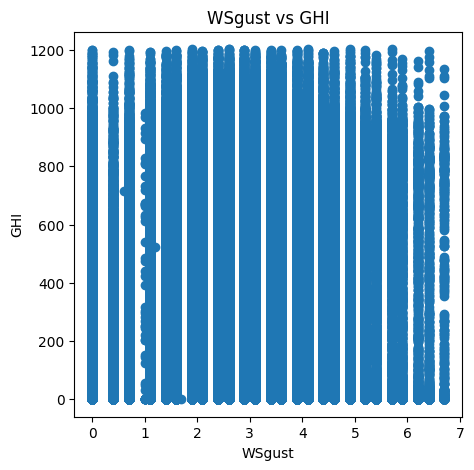

In [297]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WSgust"], df_clean['GHI'])
plt.xlabel("WSgust")
plt.ylabel('GHI')
plt.title("WSgust vs GHI")
plt.show()

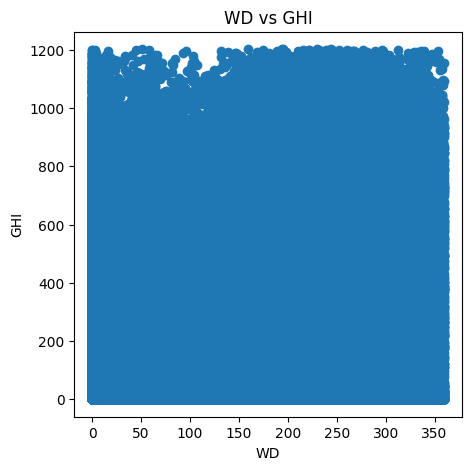

In [298]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["WD"], df_clean['GHI'])
plt.xlabel("WD")
plt.ylabel('GHI')
plt.title("WD vs GHI")
plt.show()

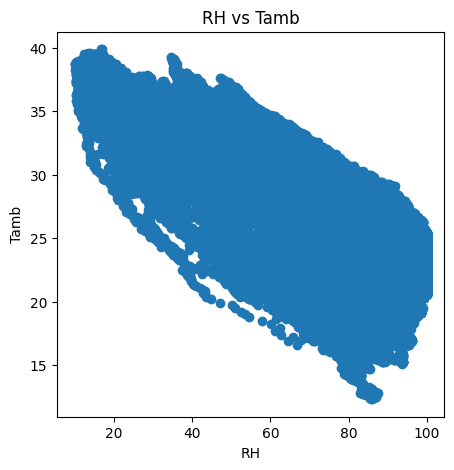

In [299]:

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["RH"], df_clean['Tamb'])
plt.xlabel("RH")
plt.ylabel("Tamb")
plt.title("RH vs Tamb")
plt.show()

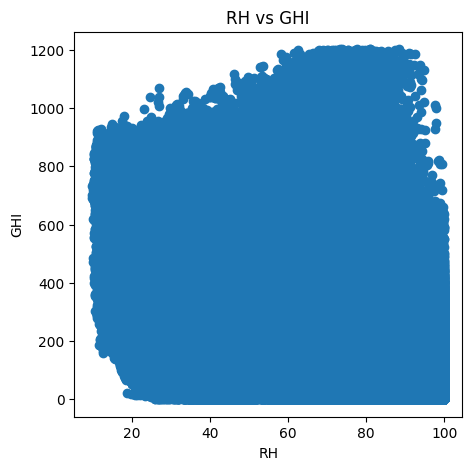

In [300]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.scatter(df_clean["RH"], df_clean['GHI'])
plt.xlabel("RH")
plt.ylabel("GHI")
plt.title("RH vs GHI")
plt.show()

Wind & Distribution Analysis

In [301]:
from windrose import WindroseAxes

<Figure size 1000x800 with 0 Axes>

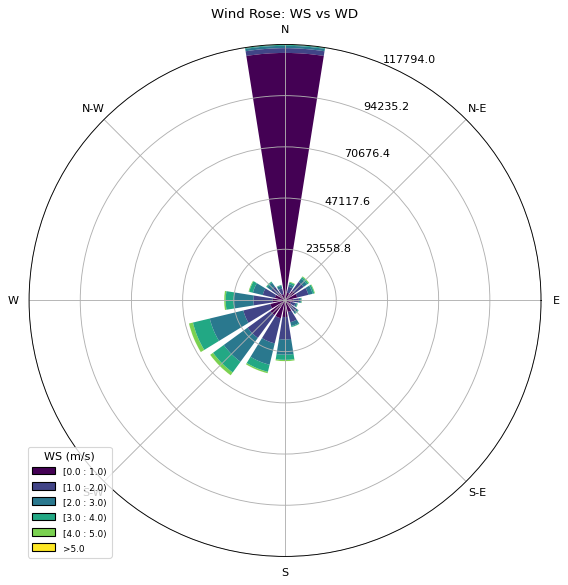

In [302]:
plt.figure(figsize=(10,8))
ax = WindroseAxes.from_ax()
ax.bar(df_clean["WD"],df_clean["WS"])
ax.set_legend(title = "WS (m/s)")
plt.title("Wind Rose: WS vs WD")
plt.show()

Text(0.5, 1.0, 'Histogram of GHI')

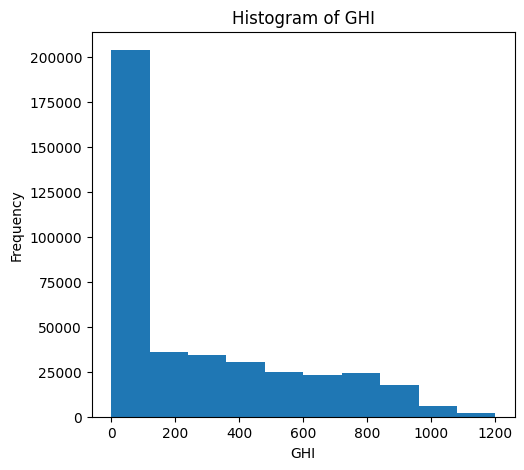

In [303]:
plt.figure(figsize=(12,5)) # Histogram for GHI
plt.subplot(1,2,1)
plt.hist(df_clean['GHI'])
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')

Text(0.5, 1.0, 'Histogram of WS')

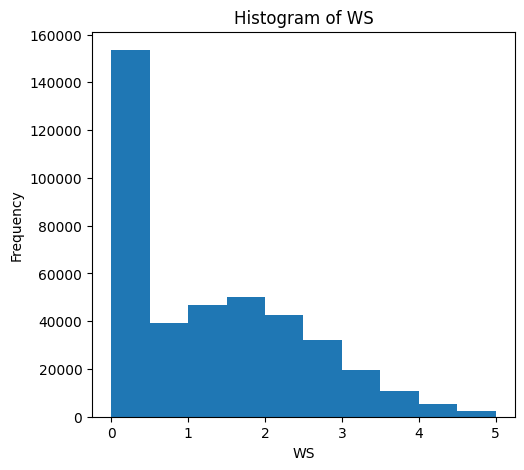

In [304]:
plt.figure(figsize=(12,5)) # Histogram for GHI
plt.subplot(1,2,1)
plt.hist(df_clean['WS'])
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.title('Histogram of WS')

Temperature Analysis

In [305]:
cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
corr = df_clean[cols].corr()
print(corr)

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.886180 -0.639660 -0.617055 -0.513239
Tamb -0.886180  1.000000  0.658793  0.593554  0.561528
GHI  -0.639660  0.658793  1.000000  0.856871  0.843680
DNI  -0.617055  0.593554  0.856871  1.000000  0.481462
DHI  -0.513239  0.561528  0.843680  0.481462  1.000000


Bubble Chart

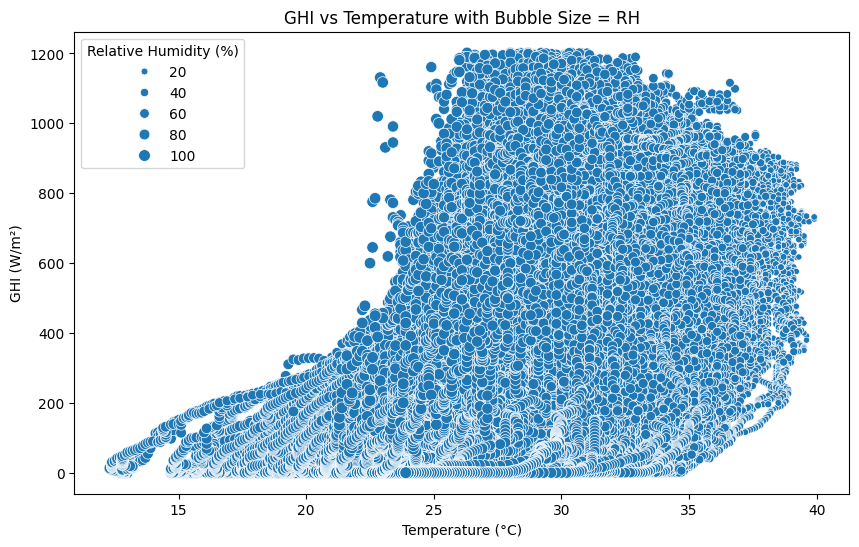

In [306]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_clean,x = "Tamb",y = "GHI",size= "RH")
plt.xlabel("Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.title("GHI vs Temperature with Bubble Size = RH")
plt.legend(title = "Relative Humidity (%)")
plt.show()